# Import the necessary libraries for Data Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Restaurant dataset into a DataFrame

In [2]:
df=pd.read_csv('dataset.csv',encoding='ISO-8859-1')
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# LEVEL 3-Task 3:Data Visualization

# LEVEL 3-Task 3(i):Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).


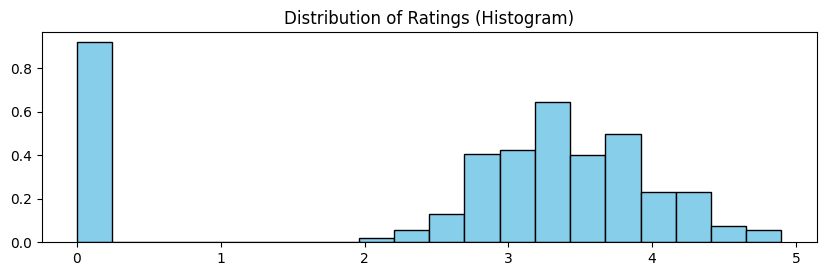

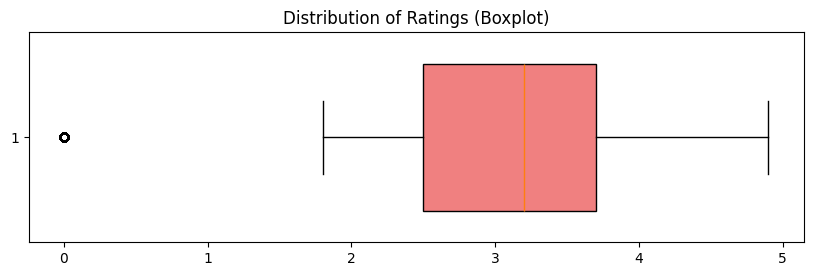

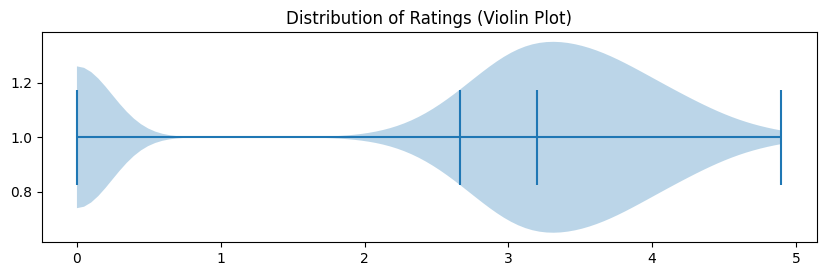

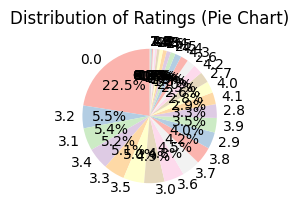

In [3]:
# Histogram
plt.figure(figsize=(22, 6))
plt.subplot(2, 2, 1)
plt.hist(df['Aggregate rating'],bins=20,color='skyblue',edgecolor='black',density=True)
plt.title('Distribution of Ratings (Histogram)')
plt.show()
# Boxplot
plt.figure(figsize=(22, 6))
plt.subplot(2, 2, 2)
plt.boxplot(df['Aggregate rating'],vert=False,widths=0.7,patch_artist=True,boxprops=dict(facecolor='lightcoral'))
plt.title('Distribution of Ratings (Boxplot)')
plt.show()
#Violin Plot
plt.figure(figsize=(22, 6))
plt.subplot(2, 2, 3)
plt.violinplot(df['Aggregate rating'],showmeans=True,showextrema=True,showmedians=True,vert=False,widths=0.7)
plt.title('Distribution of Ratings (Violin Plot)')
plt.show()
#Pie Chart
plt.subplot(2, 2, 4)
rating_distribution=df['Aggregate rating'].value_counts()
plt.pie(rating_distribution, labels=rating_distribution.index,autopct='%1.1f%%',startangle=90,colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Ratings (Pie Chart)')
plt.show()


# LEVEL 3-Task 3(ii):Compare the average ratings of different cuisines or cities using appropriate visualizations.


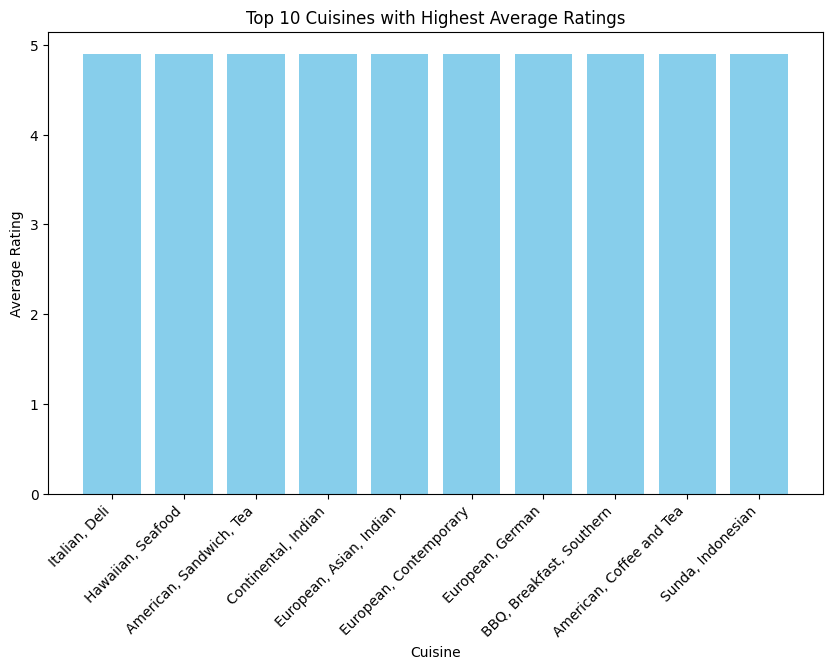

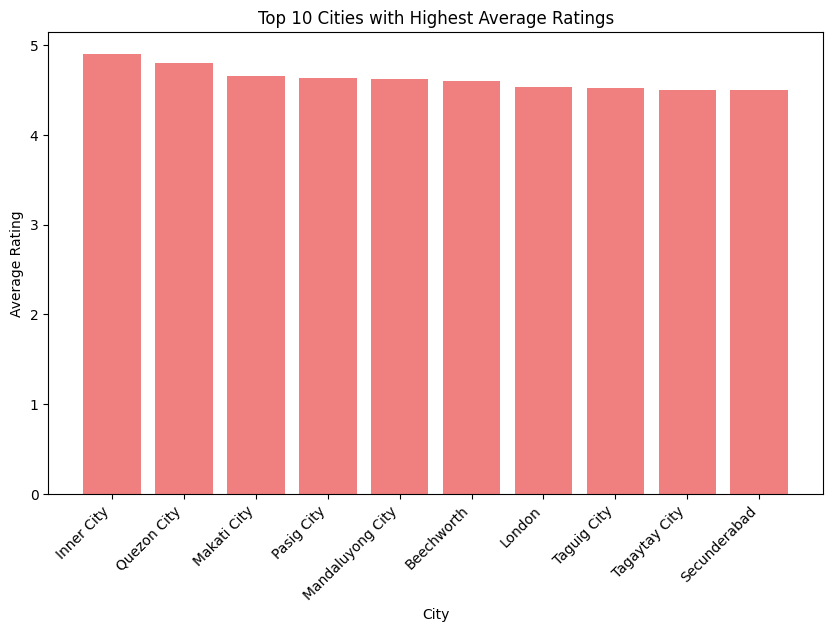

In [4]:
# Compare average ratings of different cuisines
avg_rating_by_cuisine=df.groupby('Cuisines')['Aggregate rating'].mean()
top_cuisines=avg_rating_by_cuisine.sort_values(ascending=False).head(10)
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.bar(top_cuisines.index, top_cuisines.values, color='skyblue')
plt.title('Top 10 Cuisines with Highest Average Ratings')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Compare average ratings of different cities
avg_rating_by_city=df.groupby('City')['Aggregate rating'].mean()
top_cities=avg_rating_by_city.sort_values(ascending=False).head(10)
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 2)
plt.bar(top_cities.index, top_cities.values, color='lightcoral')
plt.title('Top 10 Cities with Highest Average Ratings')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


# LEVEL 3-Task 3(iii):Visualize the relationship between various features and the target variable to gain insights.


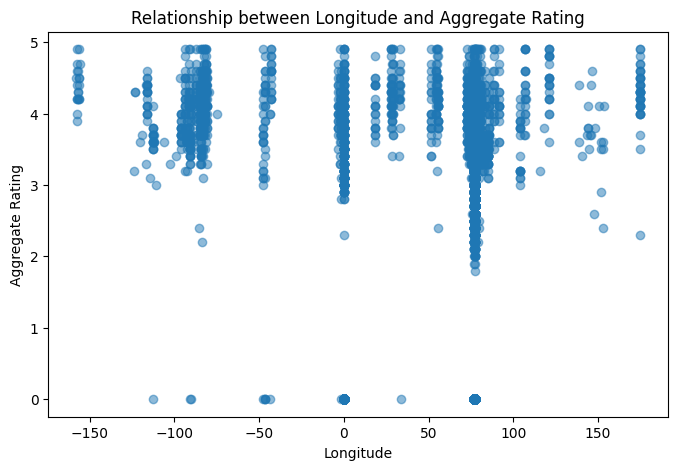

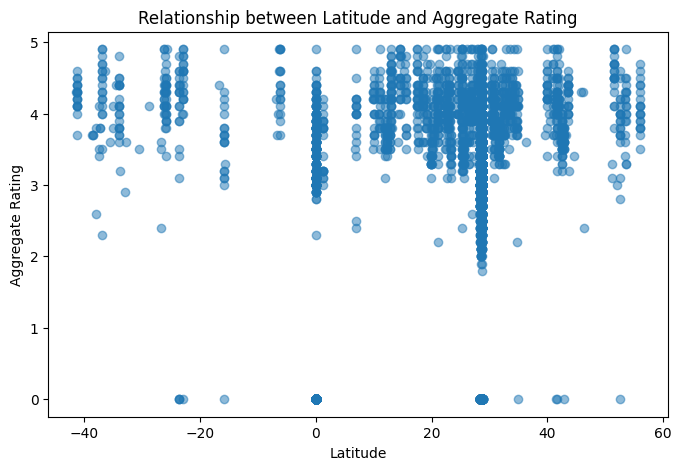

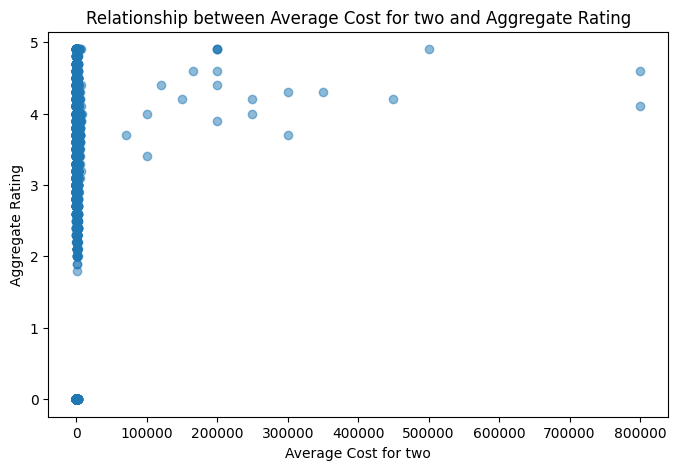

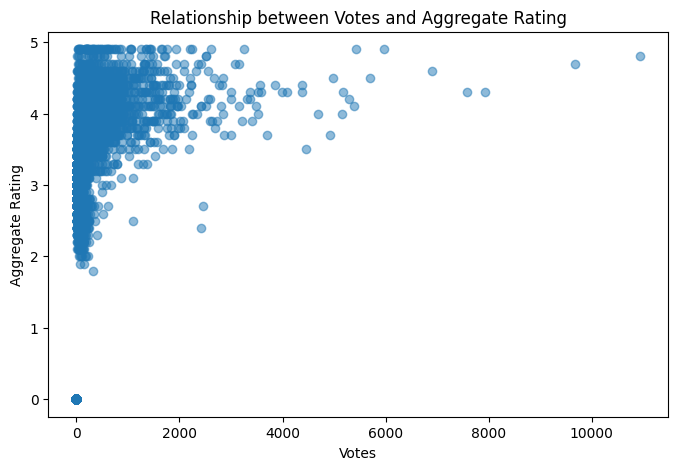

In [5]:
# Example 1: Scatter plot for numerical features
numerical_features=['Longitude','Latitude','Average Cost for two','Votes']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['Aggregate rating'], alpha=0.5)
    plt.title(f'Relationship between {feature} and Aggregate Rating')
    plt.xlabel(feature)
    plt.ylabel('Aggregate Rating')
    plt.show()





<Figure size 1200x600 with 0 Axes>

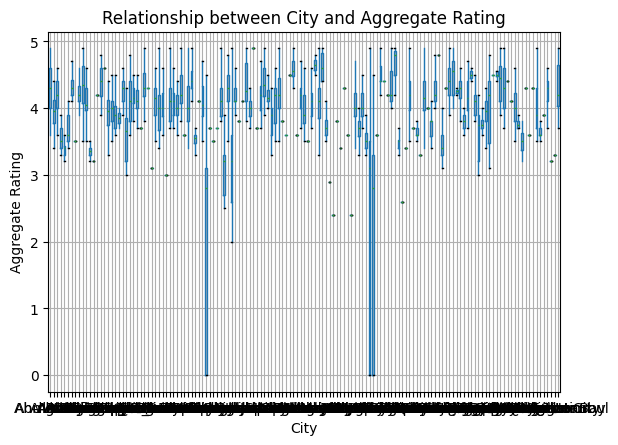

<Figure size 1200x600 with 0 Axes>

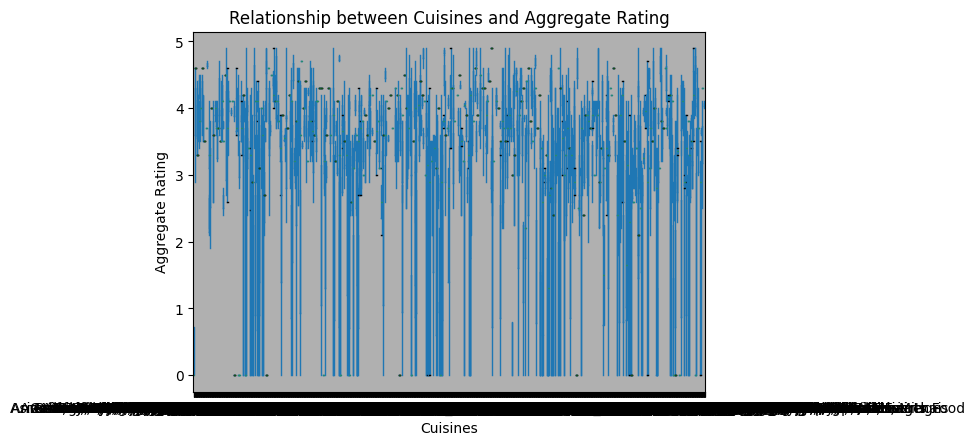

<Figure size 1200x600 with 0 Axes>

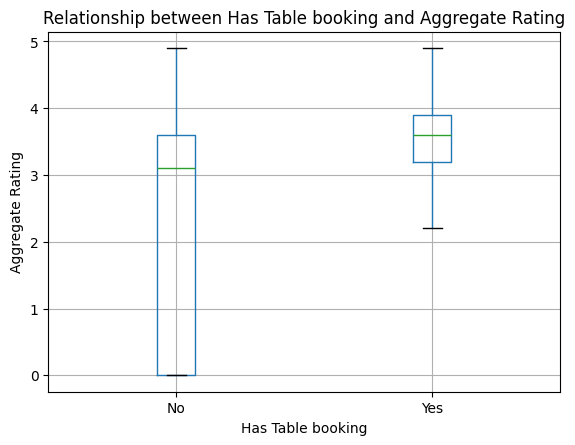

<Figure size 1200x600 with 0 Axes>

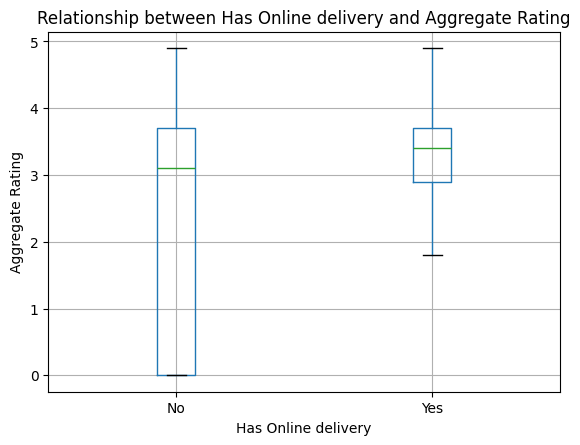

In [9]:
# Example 2: Boxplot for categorical features
categorical_features=['City','Cuisines','Has Table booking','Has Online delivery']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    df.boxplot(column='Aggregate rating',by=feature,showfliers=False)
    plt.title(f'Relationship between {feature} and Aggregate Rating')
    plt.suptitle('')
    plt.xlabel(feature)
    plt.ylabel('Aggregate Rating')
    plt.show()


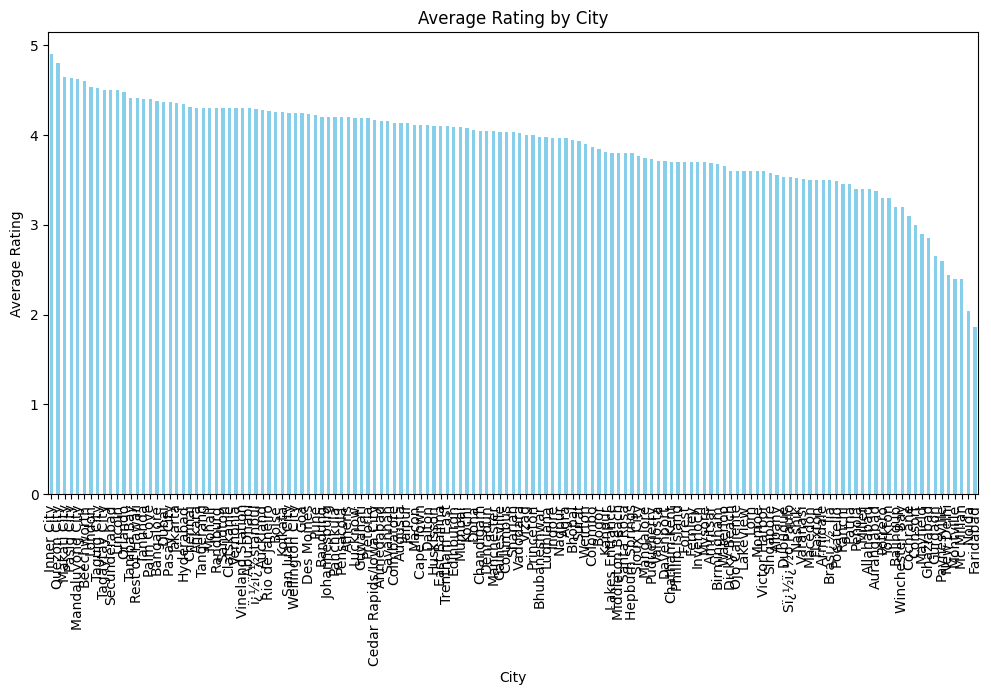

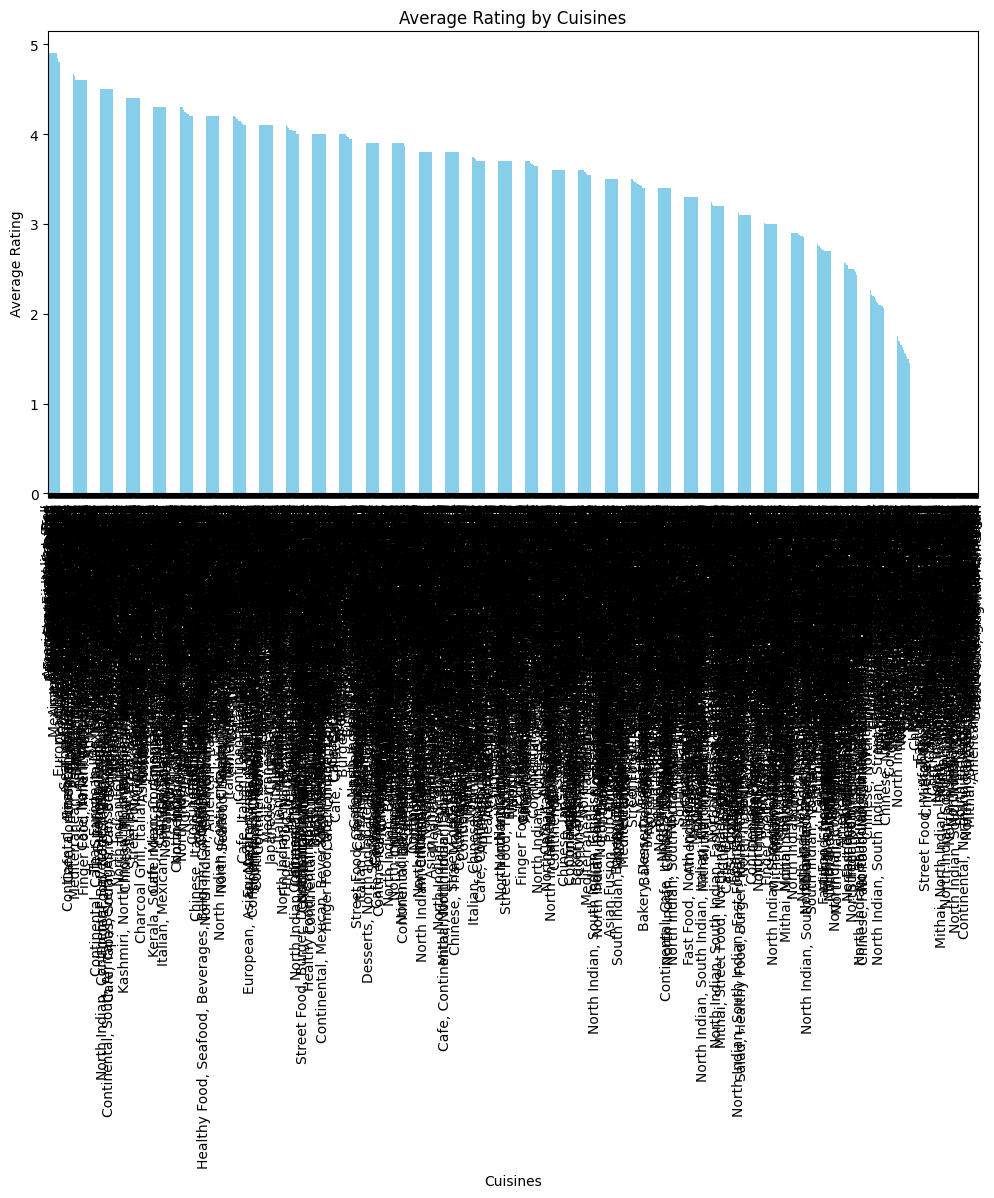

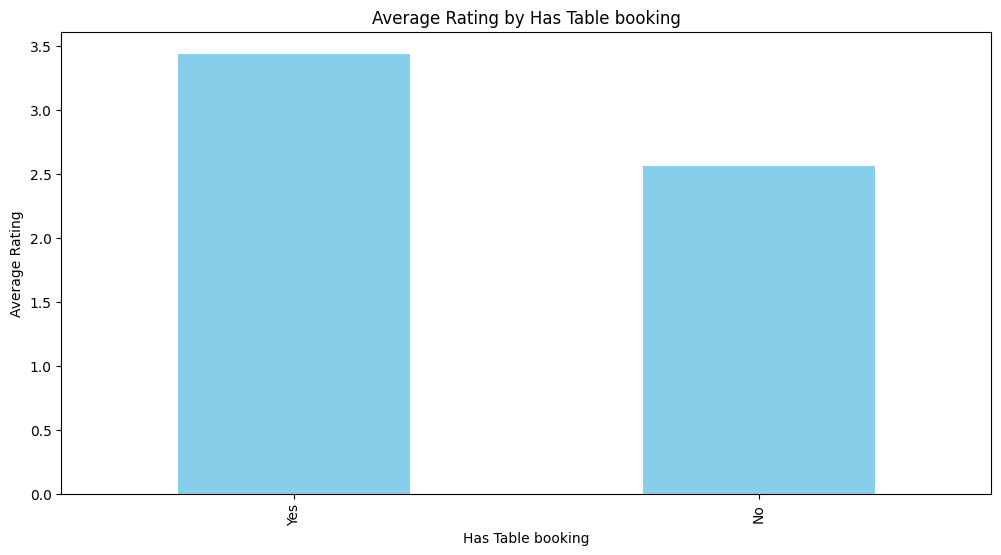

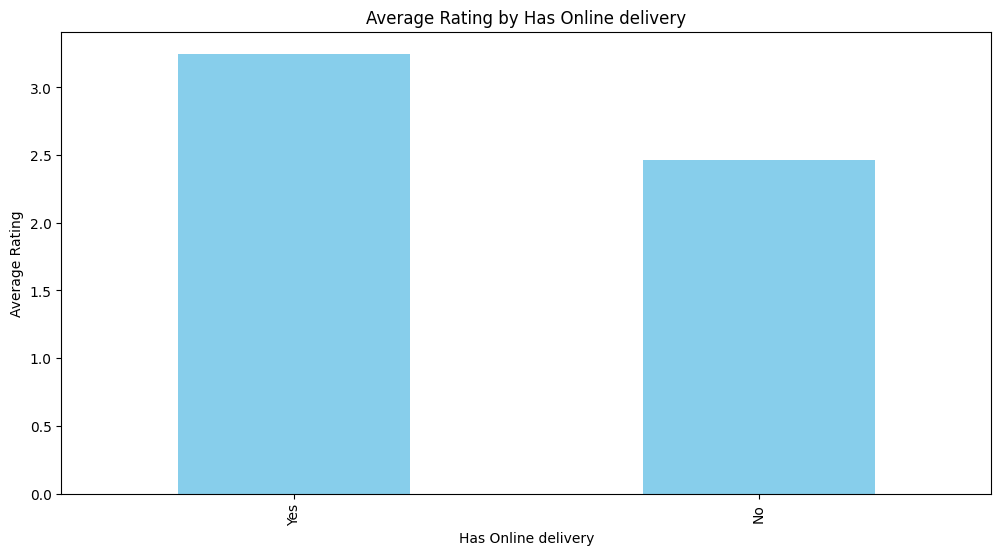

In [10]:
# Example 3: Bar plot for average rating by category
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    avg_ratings = df.groupby(feature)['Aggregate rating'].mean().sort_values(ascending=False)
    avg_ratings.plot(kind='bar', color='skyblue')
    plt.title(f'Average Rating by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Rating')
    plt.show()